## MLflow Quick Start: Training and Logging
This is a Quick Start notebook based on [MLflow's tutorial](https://mlflow.org/docs/latest/tutorial.html).  In this tutorial, we’ll:
* Install the MLflow library on a Databricks cluster
* Train a diabetes progression model and log metrics, parameters, models, and a .png plot from the training to the MLflow tracking server
* View the training results in the MLflow experiment UI

This notebook uses the `diabetes` dataset in scikit-learn and predicts the progression metric (a quantitative measure of disease progression after one year after) based on BMI, blood pressure, etc. It uses the scikit-learn ElasticNet linear regression model, where we vary the `alpha` and `l1_ratio` parameters for tuning. For more information on ElasticNet, refer to:
  * [Elastic net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization)
  * [Regularization and Variable Selection via the Elastic Net](https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf)

## Setup

1. Ensure you are using or create a cluster specifying 
  * **Databricks Runtime Version:** Databricks Runtime 5.0 or above 
  * **Python Version:** Python 3
1. Install required libraries or if using Databricks Runtime 5.1 or above (but not Databricks Runtime for ML), run Cmd 5.
   1. Create required libraries.
    * Source **PyPI** and enter `mlflow`.
    * Source **PyPI** and enter `scikit-learn==0.19.1`.
    * Source **PyPI** and enter `matplotlib==2.2.2`.
   1. Install the libraries into the cluster.
1. Attach this notebook to the cluster.

In [0]:
#dbutils.library.installPyPI("mlflow")
#dbutils.library.installPyPI("scikit-learn", "0.21.3")
#dbutils.library.installPyPI("matplotlib", "2.2.2")
#dbutils.library.restartPython()

#### Write Your ML Code Based on the`train_diabetes.py` Code
This tutorial is based on the MLflow's [train_diabetes.py](https://github.com/mlflow/mlflow/blob/master/examples/sklearn_elasticnet_diabetes/train_diabetes.py) example, which uses the `sklearn.diabetes` built-in dataset to predict disease progression based on various factors.

In [0]:
%fs ls 

path,name,size
dbfs:/1kg/,1kg/,0
dbfs:/1kg_vcfs/,1kg_vcfs/,0
dbfs:/ALL.1kg.delta/,ALL.1kg.delta/,0
dbfs:/BankMarketing/,BankMarketing/,0
dbfs:/CVSTransactions.parquet/,CVSTransactions.parquet/,0
dbfs:/DemoData/,DemoData/,0
dbfs:/FileSore/,FileSore/,0
dbfs:/FileStore/,FileStore/,0
dbfs:/FileStoreantlr-runtime-3.5.2.jar,FileStoreantlr-runtime-3.5.2.jar,167761
dbfs:/FileStoreavro-1.7.7.jar,FileStoreavro-1.7.7.jar,436302


In [0]:
# Import various libraries including matplotlib, sklearn, mlflow
import os
import warnings
import sys

import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

# Import mlflow
import mlflow
import mlflow.sklearn

# Load Diabetes datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Create pandas DataFrame for sklearn ElasticNet linear_model
Y = np.array([y]).transpose()
d = np.concatenate((X, Y), axis=1)
cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']
data = pd.DataFrame(d, columns=cols)

#### Plot the ElasticNet Descent Path
As an example of recording arbitrary output files in MLflow, we'll plot the [ElasticNet Descent Path](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html) for the ElasticNet model by *alpha* for the specified *l1_ratio*.

The `plot_enet_descent_path` function below:
* Returns an image that can be displayed in our Databricks notebook via `display`
* As well as saves the figure `ElasticNet-paths.png` to the Databricks cluster's driver node
* This file is then uploaded to MLflow using the `log_artifact` within `train_diabetes`

In [0]:
def plot_enet_descent_path(X, y, l1_ratio):
    # Compute paths
    eps = 5e-3  # the smaller it is the longer is the path

    # Reference the global image variable
    global image
    
    print("Computing regularization path using the elastic net.")
    alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=l1_ratio, fit_intercept=False)

    # Display results
    fig = plt.figure(1)
    ax = plt.gca()

    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_e, c in zip(coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    title = 'ElasticNet Path by alpha for l1_ratio = ' + str(l1_ratio)
    plt.title(title)
    plt.axis('tight')

    # Display images
    image = fig
    
    # Save figure
    fig.savefig("ElasticNet-paths.png")

    # Close plot
    plt.close(fig)

    # Return images
    return image    

#### Organize MLflow Runs into Experiments

As you start using your MLflow server for more tasks, you may want to separate them out. MLflow allows you to create [experiments](https://mlflow.org/docs/latest/tracking.html#organizing-runs-in-experiments) to organize your runs. To report your run to a specific experiment, pass an experiment name to `mlflow.set_experiment`.

In [0]:
dbutils.fs.help()

dbutils.fs provides utilities for working with FileSystems. Most methods in
this package can take either a DBFS path (e.g., "/foo" or "dbfs:/foo"), or
another FileSystem URI.

For more info about a method, use dbutils.fs.help("methodName") .

In notebooks, you can also use the %fs shorthand to access DBFS. The %fs shorthand maps
straightforwardly onto dbutils calls. For example, "%fs head --maxBytes=10000 /file/path"
translates into "dbutils.fs.head("/file/path", maxBytes = 10000)".
 fsutils cp(from: String, to: String, recurse: boolean = false): boolean -> Copies a file or directory, possibly across FileSystems head(file: String, maxBytes: int = 65536): String -> Returns up to the first 'maxBytes' bytes of the given file as a String encoded in UTF-8 ls(dir: String): Seq -> Lists the contents of a directory mkdirs(dir: String): boolean -> Creates the given directory if it does not exist, also creating any necessary parent directories mv(from: String, to: String, recurse: boolean = false): boolean -> Moves a file or directory, possibly across FileSystems put(file: String, contents: String, overwrite: boolean = false): boolean -> Writes the given String out to a file, encoded in UTF-8 rm(dir: String, recurse: boolean = false): boolean -> Removes a file or directory mount mount(source: String, mountPoint: String, encryptionType: String = "", owner: String = null, extraConfigs: Map = Map.empty[String, String]): boolean -> Mounts the given source directory into DBFS at the given mount point mounts: Seq -> Displays information about what is mounted within DBFS refreshMounts: boolean -> Forces all machines in this cluster to refresh their mount cache, ensuring they receive the most recent information unmount(mountPoint: String): boolean -> Deletes a DBFS mount point

In [0]:
 dbutils.fs.mkdirs("/Users/tanveer.shaikh@databricks.com/Experiments/")

Out[50]: True

In [0]:
%fs ls /Users/tanveer.shaikh@databricks.com/Experiments

In [0]:
#display(dbutils.fs.ls("dbfs:/soham"))
dbutils.fs.rm("/Users/tanveer.shaikh@databricks.com/Experiments/",True)

Out[48]: True

In [0]:
mlflow.set_experiment("/Users/tanveer.shaikh@databricks.com/Experiments")

INFO: '/Users/tanveer.shaikh@databricks.com/Experiments' does not exist. Creating a new experiment

#### Train the Diabetes Model
The next function trains Elastic-Net linear regression based on the input parameters of `alpha (in_alpha)` and `l1_ratio (in_l1_ratio)`.

In addition, this function uses MLflow Tracking to record its
* parameters
* metrics
* model
* arbitrary files, namely the above noted Lasso Descent Path plot.

**Tip:** We use `with mlflow.start_run:` in the Python code to create a new MLflow run. This is the recommended way to use MLflow in notebook cells. Whether your code completes or exits with an error, the `with` context will make sure that we close the MLflow run, so you don't have to call `mlflow.end_run` later in the code.

In [0]:
# train_diabetes
#   Uses the sklearn Diabetes dataset to predict diabetes progression using ElasticNet
#       The predicted "progression" column is a quantitative measure of disease progression one year after baseline
#       http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
def train_diabetes(data, in_alpha, in_l1_ratio):
  # Evaluate metrics
  def eval_metrics(actual, pred):
      rmse = np.sqrt(mean_squared_error(actual, pred))
      mae = mean_absolute_error(actual, pred)
      r2 = r2_score(actual, pred)
      return rmse, mae, r2

  warnings.filterwarnings("ignore")
  np.random.seed(40)

  # Split the data into training and test sets. (0.75, 0.25) split.
  train, test = train_test_split(data)

  # The predicted column is "progression" which is a quantitative measure of disease progression one year after baseline
  train_x = train.drop(["progression"], axis=1)
  test_x = test.drop(["progression"], axis=1)
  train_y = train[["progression"]]
  test_y = test[["progression"]]

  if float(in_alpha) is None:
    alpha = 0.05
  else:
    alpha = float(in_alpha)
    
  if float(in_l1_ratio) is None:
    l1_ratio = 0.05
  else:
    l1_ratio = float(in_l1_ratio)
  
  # Start an MLflow run; the "with" keyword ensures we'll close the run even if this cell crashes
  with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(train_x, train_y)

    predicted_qualities = lr.predict(test_x)

    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

    # Print out ElasticNet model metrics
    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    # Log mlflow attributes for mlflow UI
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.sklearn.log_model(lr, "model")
    
    # Call plot_enet_descent_path
    image = plot_enet_descent_path(X, y, l1_ratio)
    
    # Log artifacts (output files)
    mlflow.log_artifact("ElasticNet-paths.png")

![](https://docs.databricks.com/_static/images/mlflow/elasticnet-paths-by-alpha-per-l1-ratio.png)

#### Experiment with Different Parameters

Now that we have a `train_diabetes` function that records MLflow runs, we can simply call it with different parameters to explore them. Later, we'll be able to visualize all these runs on our MLflow tracking server.

In [0]:
# Start with alpha and l1_ratio values of 0.01, 0.01
train_diabetes(data, 0.01, 0.01)

Elasticnet model (alpha=0.010000, l1_ratio=0.010000):
 RMSE: 71.40362571026475
 MAE: 60.09124839565383
 R2: 0.2291130640003659
Computing regularization path using the elastic net.

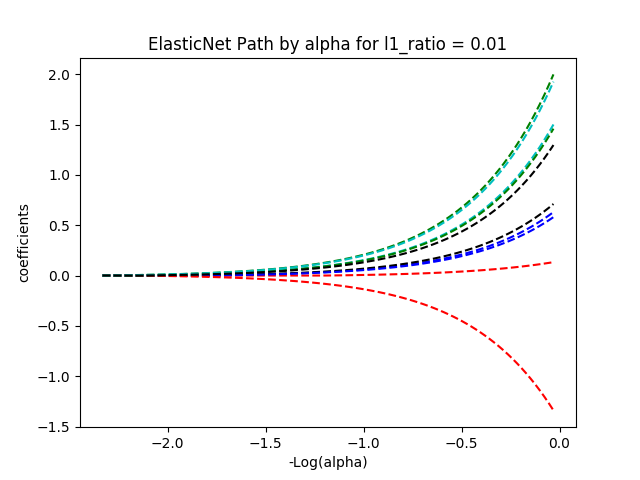

In [0]:
display(image)

In [0]:
# Start with alpha and l1_ratio values of 0.01, 0.75
train_diabetes(data, 0.01, 0.75)

Elasticnet model (alpha=0.010000, l1_ratio=0.750000):
 RMSE: 65.28994906390733
 MAE: 53.759148284349266
 R2: 0.35547047607749416
Computing regularization path using the elastic net.

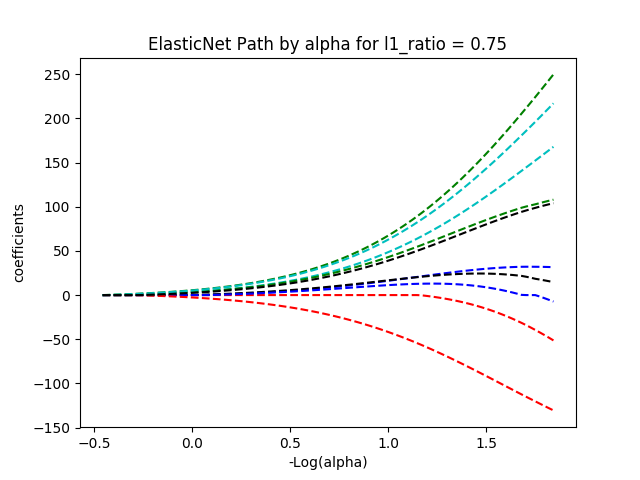

In [0]:
display(image)

In [0]:
# Start with alpha and l1_ratio values of 0.01, 1
train_diabetes(data, 0.01, 1)

Elasticnet model (alpha=0.010000, l1_ratio=1.000000):
 RMSE: 63.24666777876805
 MAE: 51.051828604086325
 R2: 0.3951809598912357
Computing regularization path using the elastic net.

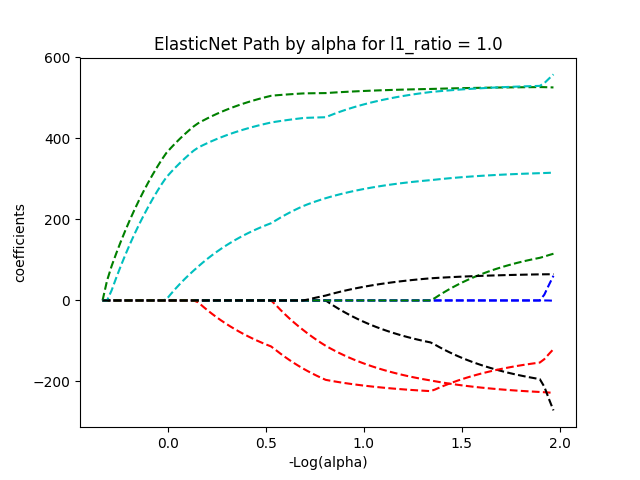

In [0]:
display(image)

In [0]:
# Start with alpha and l1_ratio values of 0.02, 1
train_diabetes(data, 0.02, 1)

Elasticnet model (alpha=0.020000, l1_ratio=1.000000):
 RMSE: 63.24744347448577
 MAE: 51.1716896160508
 R2: 0.39516612406089435
Computing regularization path using the elastic net.

In [0]:
# Start with alpha and l1_ratio values of 0.10, 1
train_diabetes(data, 0.10, 1)

Elasticnet model (alpha=0.100000, l1_ratio=1.000000):
 RMSE: 63.14833527404563
 MAE: 51.32771276362812
 R2: 0.3970601778867888
Computing regularization path using the elastic net.

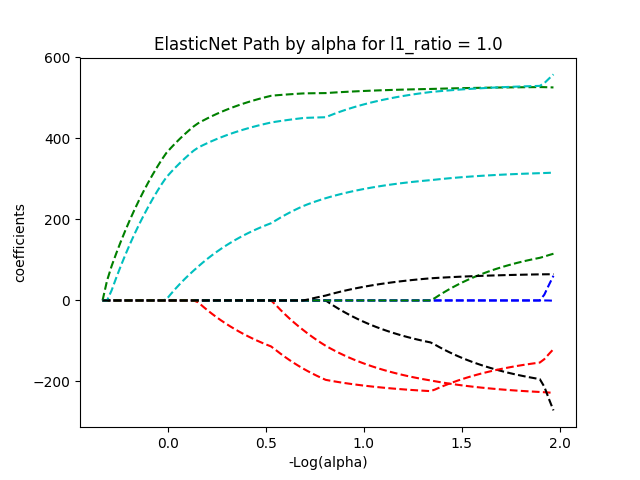

In [0]:
display(image)

In [0]:
# Start with alpha and l1_ratio values of 0.40, 1
train_diabetes(data, 0.40, 1)

Elasticnet model (alpha=0.400000, l1_ratio=1.000000):
 RMSE: 64.33862067751235
 MAE: 52.66105651846584
 R2: 0.37411628980345357
Computing regularization path using the elastic net.

## Review the experiment

1. Open the experiment `/Users/tanveer.shaikh@databricks.com/Experiments/ in the workspace.
1. Click a date to view a run.

The experiment should look something similar to the animated GIF below. Inside the experiment, you can:
* View runs
* Review the parameters and metrics on each run
* Click each run for a detailed view to see the the model, images, and other artifacts produced.

<img src="https://docs.databricks.com/_static/images/mlflow/mlflow-ui.gif"/>